In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def oi_imb(t, k, oi_imb_0):
    return oi_imb_0 * np.exp(-2*k*t)

In [6]:
oi_imb(1, 1, 1) == np.exp(-2)

True

In [8]:
def oi(t, k, oi_imb_0, oi_0):
    radical = 1 - (oi_imb_0 / oi_0)**2 * (1 - np.exp(-4*k*t))
    return oi_0 * np.sqrt(radical)

In [10]:
oi(1, 1, 1/2, 1) == np.sqrt( 1 - (1/4) * (1 - np.exp(-4)) )

True

In [11]:
def oi_b(t, k, oi_imb_0, oi_0):
    return oi_0 - oi(t, k, oi_imb_0, oi_0)

In [12]:
oi_b(1, 1, 1/2, 1) == 1 - np.sqrt( 1 - (1/4) * (1 - np.exp(-4)) )

True

In [44]:
# Plot each quantity over time
ts = np.arange(3600*24*30)  # 30d

oi_imb_0 = 0.5
oi_0 = 1
k = 4e-07

In [45]:
oi_imbs = np.array([ oi_imb(t, k, oi_imb_0) for t in ts ])
oi_imbs

array([0.5       , 0.4999996 , 0.4999992 , ..., 0.06286632, 0.06286627,
       0.06286622])

In [46]:
ois = np.array([ oi(t, k, oi_imb_0, oi_0) for t in ts ])
ois

array([1.        , 0.9999998 , 0.9999996 , ..., 0.86830419, 0.86830419,
       0.86830419])

In [47]:
oi_bs = np.array([ oi_b(t, k, oi_imb_0, oi_0) for t in ts ])
oi_bs

array([0.00000000e+00, 1.99999860e-07, 3.99999440e-07, ...,
       1.31695806e-01, 1.31695809e-01, 1.31695813e-01])

In [48]:
# check ois + oi_bs is 1 for all times
ois + oi_bs

array([1., 1., 1., ..., 1., 1., 1.])

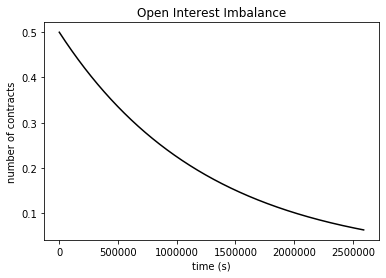

In [63]:
plt.plot(ts, oi_imbs, c='k')

plt.title('Open Interest Imbalance')
plt.xlabel('time (s)')
plt.ylabel('number of contracts')

plt.savefig('png/funding_revise_oiimb.png')

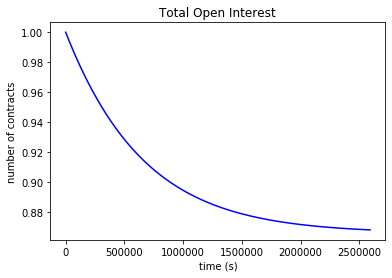

In [64]:
plt.plot(ts, ois, c='b')

plt.title('Total Open Interest')
plt.xlabel('time (s)')
plt.ylabel('number of contracts')

plt.savefig('png/funding_revise_oi.png')

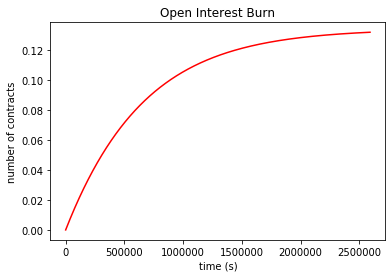

In [65]:
plt.plot(ts, oi_bs, c='r')

plt.title('Open Interest Burn')
plt.xlabel('time (s)')
plt.ylabel('number of contracts')

plt.savefig('png/funding_revise_oib.png')